In [543]:
import numpy as np
from matplotlib import pyplot as plt
from numpy import dot
from numpy.linalg import norm
from scipy.stats import mode

from scipy import spatial
from scipy.spatial import distance
from scipy.signal import argrelextrema

from sklearn.metrics.pairwise import cosine_similarity

from sklearn.model_selection import train_test_split
from sklearn.inspection import plot_partial_dependence
from sklearn.experimental import enable_hist_gradient_boosting  # noqa
from sklearn.ensemble import HistGradientBoostingRegressor

In [4]:
import datetime
from binance.client import Client

from config import *
client = Client(api_key, api_secret)

In [676]:
L = client.futures_historical_klines(symbol='BTCUSDT',
                      interval=client.KLINE_INTERVAL_3MINUTE,
                      start_str='2021-09-06 22:00:00',
                      # end_str='2021-09-12 09:00:00',
                      # end_str='2021-09-13 09:00:00',
                      limit=1500)
len(L)

3469

2500


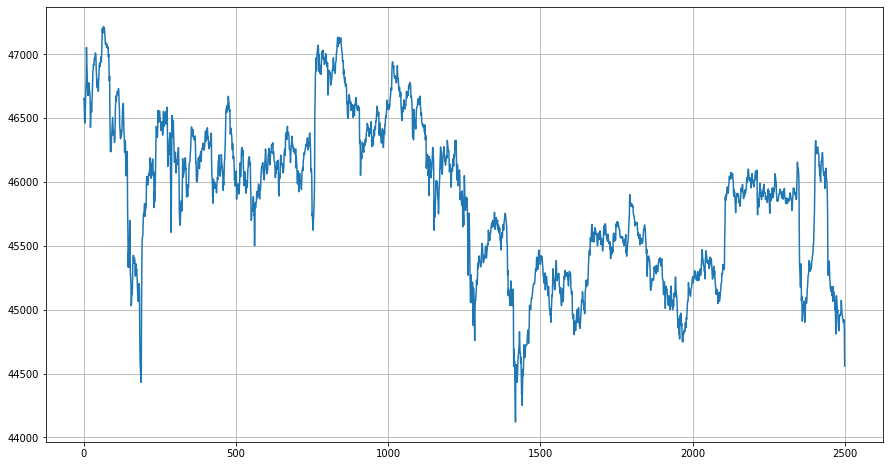

In [694]:
arr = np.array(L, dtype=np.float)
M = arr[:, 3]
M = M[500:]
M = M[:2500]
shape = M.shape[0]
print(shape)

fig = plt.figure(figsize=(15, 8))
plt.plot(M)
plt.grid()
plt.show()

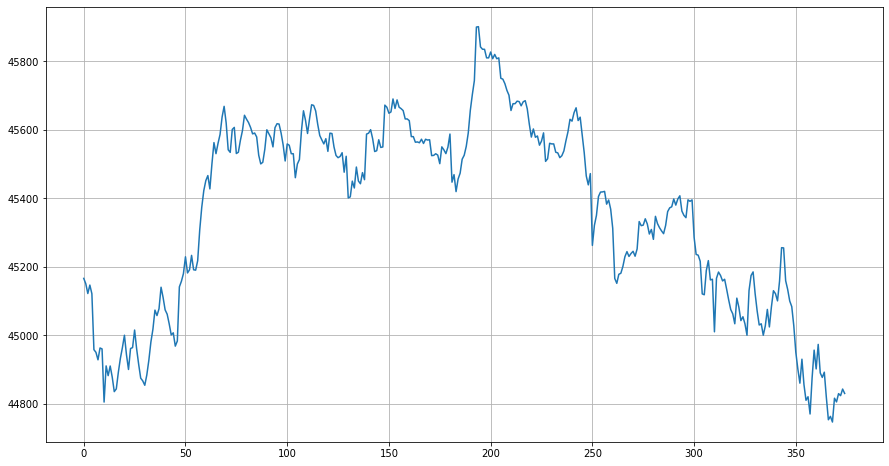

In [699]:
fig = plt.figure(figsize=(15, 8))
# plt.plot(M[90:170])
m = M[1600:1975]
# m = M[100:870] # nope
# m = M[180:410] # nope
# m = M[980:1100] # nope
# m = M[500:850] # nope
# m = M[980:1250] # nope
# m = M[980:1200] # nope
plt.plot(m)
# plt.plot(M)
plt.grid()
plt.show()

In [700]:
# T = []

375


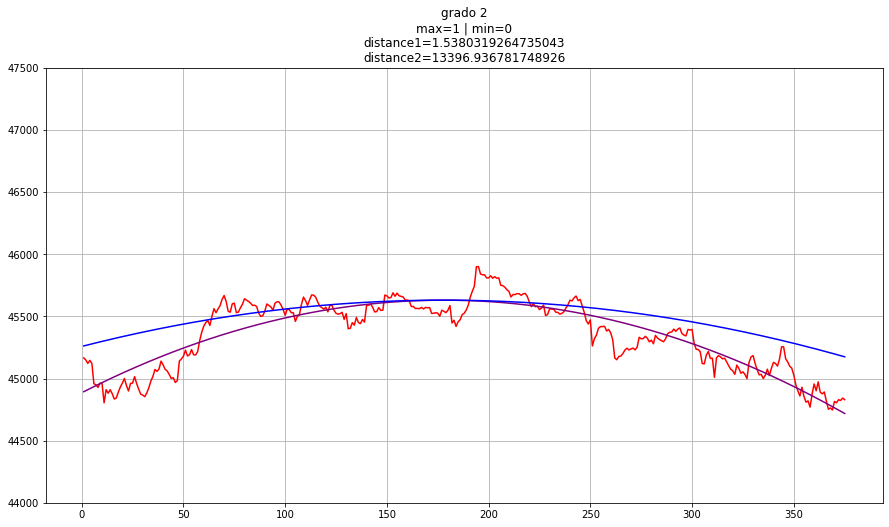

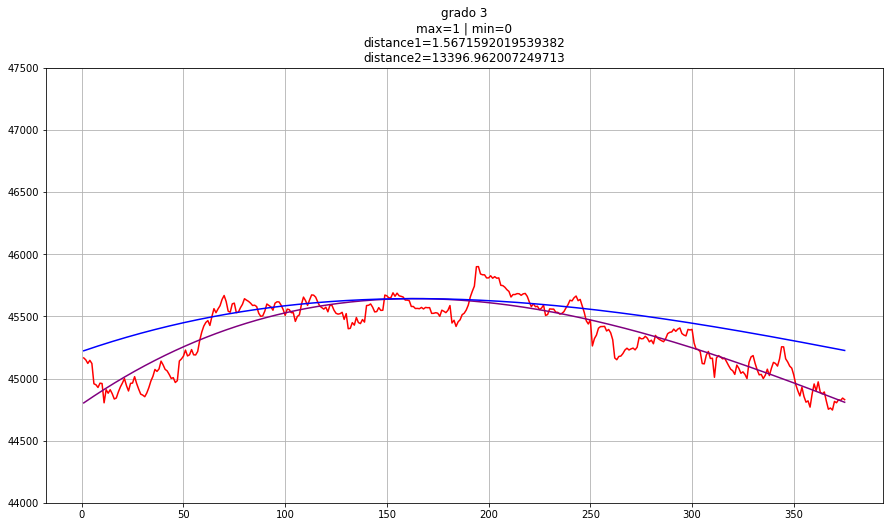

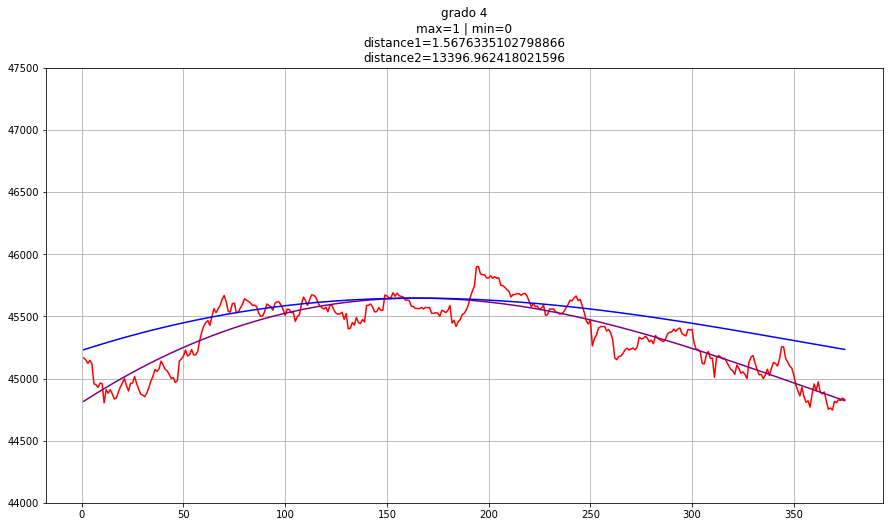

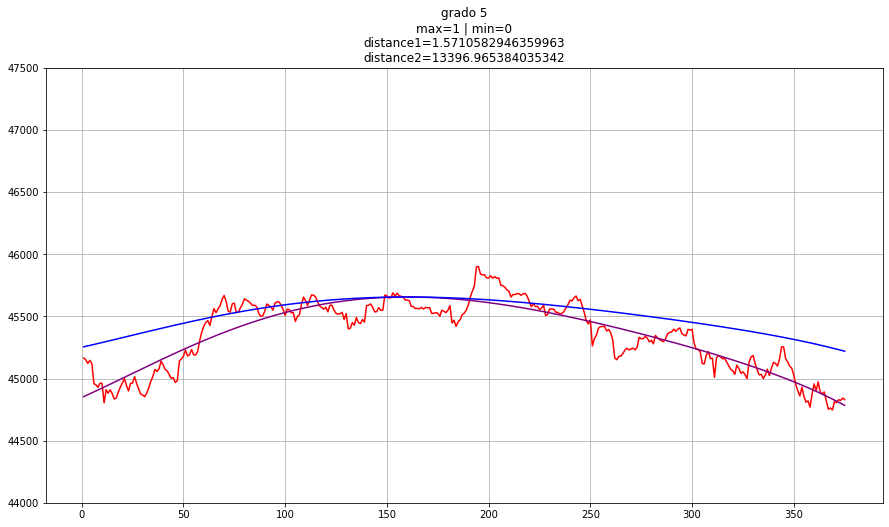

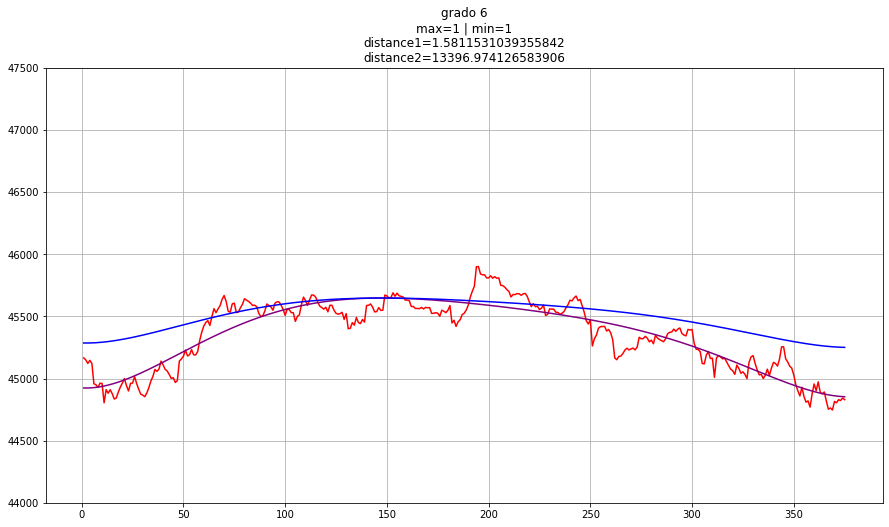

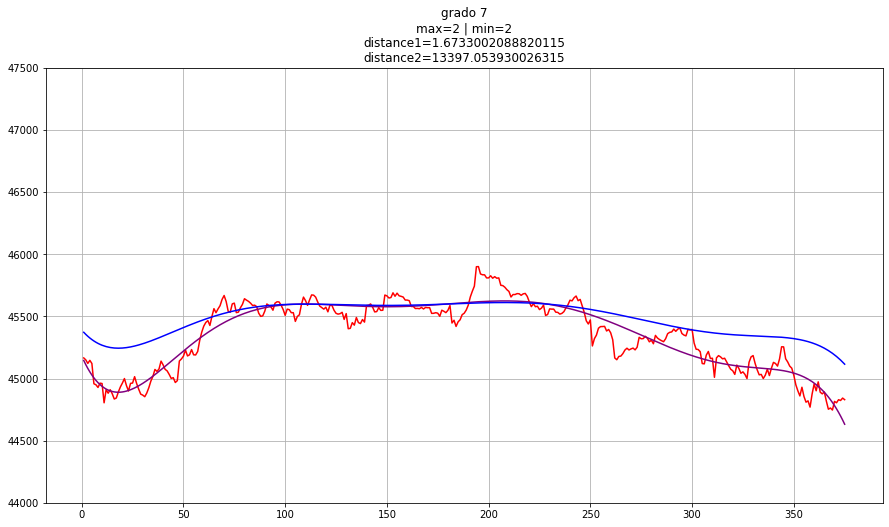

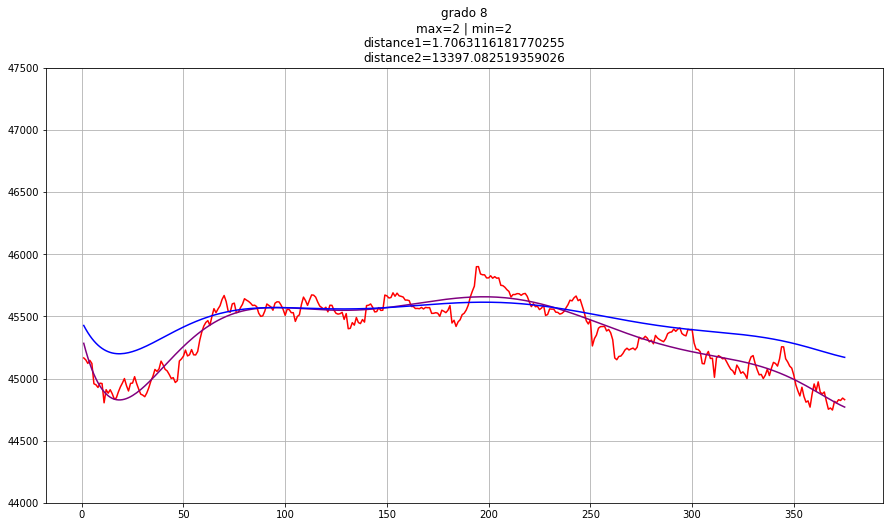

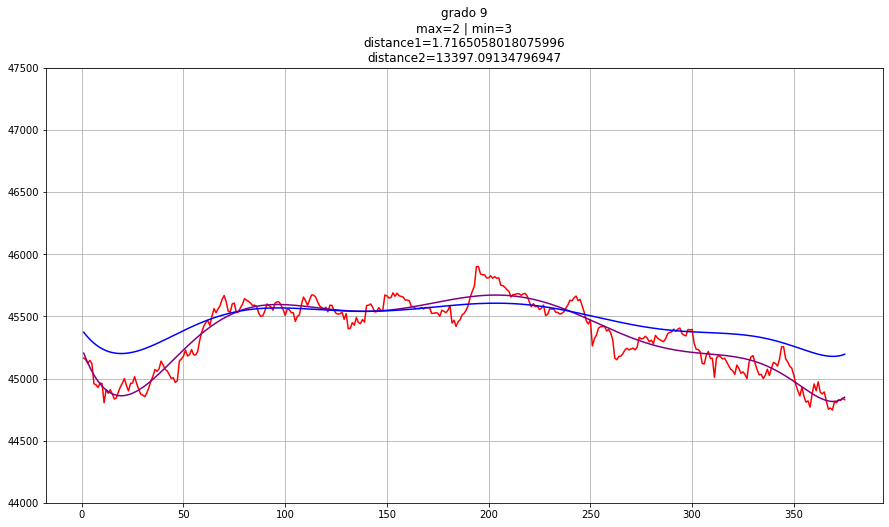

In [702]:
arrs = []
# m = m[:222].copy()
le = len(m)
print(le)
x_axis = [i+1 for i in range(len(m))]
tt = []
for i in range(2, 10):
    
    mymodel = np.poly1d(np.polyfit(x_axis, m, i))
    myline = np.linspace(1, le, len(m))
    y = mymodel(myline)
    
    y_mean = y.mean()
    line = np.array([y_mean for i in range(len(y))])
    # line = mode(y)
    
    data_max = argrelextrema(y, np.greater)[0]
    data_min = argrelextrema(y, np.less)[0]
    
    n_min = len(data_min)
    n_max = len(data_max)
    
    fig = plt.figure(figsize=(15, 8))
    plt.plot(x_axis, m, c="r")
    plt.plot(myline, y, c="purple")
    # plt.plot(x_axis, line)
    
    
    # for iii in range(0, 2):
    value = mode(np.around(y, 0))[0][0]
    linx = np.array([value for i in range(len(m))])
    # plt.plot(x_axis, linx, c='k')
    # plt.legend([z for z in range(5)])
    
    y_e = (y+line)/2
    y_x = (y+linx)/2
    # plt.plot(x_axis, y_e, c='y') # linea
    plt.plot(x_axis, y_x, c='b') # moda
    # plt.legend(['klines', 'poly_curve', 'mean_const', 'moda_const', "media_curve", "moda_curve"])
    
#     vecx = np.array([myline, y])
#     vecy = np.array([x_axis, line])
    vecx = y.copy()
    vecy = line.copy()
    vecz = linx.copy()
    vecu = myline.copy()
#     edst = distance.euclidean(vecx, vecy)
    edst1 = spatial.distance.cosine(vecx, vecy)
    edst2 = spatial.distance.cosine(vecx, vecz)
    edst3 = spatial.distance.cosine(vecx, vecu)
    tt.append([edst1, edst2, edst3])
    # edst = dot(vecx, vecy)/(norm(vecx)*norm(vecy))
    # edst = np.linalg.norm(vecx - vecy)
    
    # minimos y maximos locales
    for d in data_min:
        # print(d)
        # plt.plot(myline[d], y[d], "o", c='orange')
        pass
    for d in data_max:
        # print(d)
        # plt.plot(myline[d], y[d], "^", c='green')
        pass
    
    plt.title(f"grado {i}\nmax={n_max} | min={n_min}\ndistance1={edst1*1e5}\ndistance2={edst3*1e5}")
    plt.ylim([44000, 47500])
    
    plt.grid()
    plt.show()
    
    arrs.append(y)
# T.append(tt)

In [652]:
100*((y[0] - y[-1])/y[-1])

-0.6854083869860247

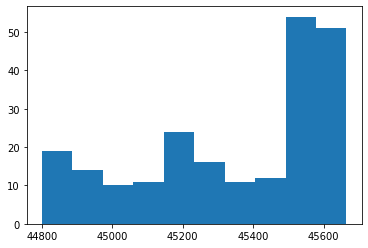

In [590]:
u_u = plt.hist(y)

In [591]:
u_u

(array([19., 14., 10., 11., 24., 16., 11., 12., 54., 51.]),
 array([44800.53561853, 44886.974152  , 44973.41268546, 45059.85121892,
        45146.28975239, 45232.72828585, 45319.16681931, 45405.60535278,
        45492.04388624, 45578.4824197 , 45664.92095317]),
 <BarContainer object of 10 artists>)

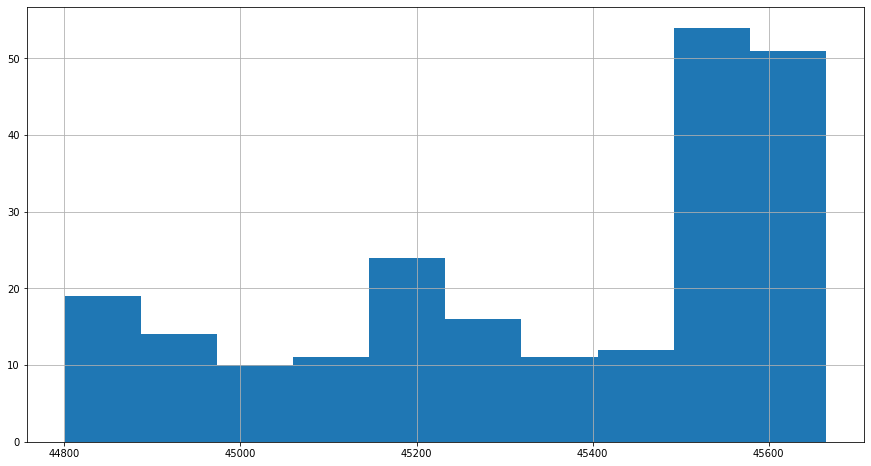

In [586]:
fig = plt.figure(figsize=(15, 8))
plt.hist(y)
plt.grid()
plt.show()

In [625]:
np.array(tt).std(axis=0)*1e5

array([0.50254904, 0.50254904, 0.43646822])

In [617]:
np.array(tt).std(axis=0)*1e5

array([0.43838947, 0.43838947, 0.37945231])

In [629]:
np.array(tt).std(axis=0)*1e5 # nope

array([0.08522065, 0.08522065, 0.0738589 ])

In [633]:
np.array(tt).std(axis=0)*1e5 # nope

array([0.08417529, 0.08417529, 0.07323582])

In [636]:
np.array(tt).std(axis=0)*1e5 # nope

array([0.35057498, 0.35057498, 0.3021791 ])

In [653]:
np.array(tt).std(axis=0)*1e5 # nope

array([0.32823794, 0.32823794, 0.28424695])

In [658]:
np.array(tt).std(axis=0)*1e5

array([0.05308251, 0.05308251, 0.04597188])

In [663]:
np.array(tt)[:, -1].std(axis=0)*1e5

0.045971880866909794

In [565]:
np.array(tt).std()*1e5

0.058077109081402456

In [579]:
np.array(tt).std(axis=0)*1e5

array([0.05807711, 0.05807711])

In [547]:
mode?

In [550]:
mode(np.around(y, 1))

ModeResult(mode=array([45568.5]), count=array([2]))

In [551]:
mode(np.around(y, 2))

ModeResult(mode=array([45586.35]), count=array([2]))

In [552]:
mode(np.around(y, 3))

ModeResult(mode=array([44800.536]), count=array([1]))

In [554]:
mode(np.around(y, 3))[0][0]

44800.536

In [485]:
print(T)

[[0.9999474623204337, 0.9999438127839984, 0.9999376331179145, 0.999934936528893, 0.9999346927271467, 0.9999336654686862, 0.9999333918203375, 0.9999333735301246]]


In [489]:
print(T)

[[0.9999474623204337, 0.9999438127839984, 0.9999376331179145, 0.999934936528893, 0.9999346927271467, 0.9999336654686862, 0.9999333918203375, 0.9999333735301246], [0.9999688690917882, 0.9999648979467605, 0.9999637771059521, 0.9999587309938344, 0.9999573235304844, 0.9999571484902763, 0.9999570619927022, 0.9999563339570352]]


In [493]:
print(T)

[[0.9999474623204337, 0.9999438127839984, 0.9999376331179145, 0.999934936528893, 0.9999346927271467, 0.9999336654686862, 0.9999333918203375, 0.9999333735301246], [0.9999688690917882, 0.9999648979467605, 0.9999637771059521, 0.9999587309938344, 0.9999573235304844, 0.9999571484902763, 0.9999570619927022, 0.9999563339570352], [0.9999998174983366, 0.9999992585730062, 0.9999989224776816, 0.9999984260905358, 0.9999983687507675, 0.9999982288791734, 0.9999979678758132, 0.9999967832023409]]


In [495]:
ttt = np.array(T)
ttt

array([[0.99994746, 0.99994381, 0.99993763, 0.99993494, 0.99993469,
        0.99993367, 0.99993339, 0.99993337],
       [0.99996887, 0.9999649 , 0.99996378, 0.99995873, 0.99995732,
        0.99995715, 0.99995706, 0.99995633],
       [0.99999982, 0.99999926, 0.99999892, 0.99999843, 0.99999837,
        0.99999823, 0.99999797, 0.99999678]])

In [501]:
ttt.std(axis=1)*1e5

array([0.50254904, 0.43838947, 0.08522065])

In [505]:
print(T)

[[5.253767956625577e-05, 5.6187216001646334e-05, 6.236688208549612e-05, 6.50634711070186e-05, 6.530727285325444e-05, 6.633453131377198e-05, 6.660817966253063e-05, 6.662646987543042e-05]]


In [509]:
print(T)

[[5.253767956625577e-05, 5.6187216001646334e-05, 6.236688208549612e-05, 6.50634711070186e-05, 6.530727285325444e-05, 6.633453131377198e-05, 6.660817966253063e-05, 6.662646987543042e-05], [3.11309082118294e-05, 3.510205323953297e-05, 3.622289404792145e-05, 4.1269006165634003e-05, 4.2676469515612325e-05, 4.2851509723718095e-05, 4.293800729782138e-05, 4.366604296479615e-05]]


In [513]:
print(T)

[[5.253767956625577e-05, 5.6187216001646334e-05, 6.236688208549612e-05, 6.50634711070186e-05, 6.530727285325444e-05, 6.633453131377198e-05, 6.660817966253063e-05, 6.662646987543042e-05], [3.11309082118294e-05, 3.510205323953297e-05, 3.622289404792145e-05, 4.1269006165634003e-05, 4.2676469515612325e-05, 4.2851509723718095e-05, 4.293800729782138e-05, 4.366604296479615e-05], [1.8250166344824237e-07, 7.414269937999762e-07, 1.0775223183712157e-06, 1.5739094642031048e-06, 1.6312492324699335e-06, 1.7711208265547285e-06, 2.032124186812645e-06, 3.216797659133519e-06]]


In [514]:
tt2 = np.array(T)
tt2

array([[5.25376796e-05, 5.61872160e-05, 6.23668821e-05, 6.50634711e-05,
        6.53072729e-05, 6.63345313e-05, 6.66081797e-05, 6.66264699e-05],
       [3.11309082e-05, 3.51020532e-05, 3.62228940e-05, 4.12690062e-05,
        4.26764695e-05, 4.28515097e-05, 4.29380073e-05, 4.36660430e-05],
       [1.82501663e-07, 7.41426994e-07, 1.07752232e-06, 1.57390946e-06,
        1.63124923e-06, 1.77112083e-06, 2.03212419e-06, 3.21679766e-06]])

In [542]:
tt2.std(axis=1)*1e5

array([0.50254904, 0.43838947, 0.08522065])

In [431]:
U = []
for i, xx in enumerate(arrs[:-1]):
    u = []
    for j, yy in enumerate(arrs[:-1]):
        dist = distance.cosine(xx, yy)
        u.append(dist)
    U.append(u)
U = np.array(U)
for vec in U:
    # print(list(np.around(vec, 6)))
    print(list(vec+1))

[1.0, 1.0000005589254322, 1.000000895020818, 1.0000013914080546, 1.0000014487478333, 1.0000015886194529, 1.0000018496228609]
[1.0000005589254322, 1.0, 1.0000003360955738, 1.0000008324830882, 1.000000889822899, 1.0000010296945965, 1.0000012906981501]
[1.000000895020818, 1.0000003360955738, 1.0, 1.0000004963876807, 1.0000005537275107, 1.0000006935992554, 1.0000009546028972]
[1.0000013914080546, 1.0000008324830882, 1.0000004963876807, 1.0, 1.0000000573398586, 1.0000001972116728, 1.0000004582154438]
[1.0000014487478333, 1.000000889822899, 1.0000005537275107, 1.0000000573398586, 1.0, 1.0000001398718221, 1.0000004008756083]
[1.0000015886194529, 1.0000010296945965, 1.0000006935992554, 1.0000001972116728, 1.0000001398718221, 1.0, 1.0000002610038226]
[1.0000018496228609, 1.0000012906981501, 1.0000009546028972, 1.0000004582154438, 1.0000004008756083, 1.0000002610038226, 1.0]


In [432]:
mymodel = np.poly1d(np.polyfit(x_axis, m, 2))
x = np.linspace(0, le, len(m))
# x = [i for i in range(len(x_axis))]
y = mymodel(myline)
# y_norm = 100*(y-min(y))/(max(y)-min(y))
y_norm = y - min(y)
angle = np.rad2deg(np.arctan2(y_norm[-1] - y_norm[0], x[-1] - x[0]))
angle

-21.629396910925813

In [421]:
### 1
edist = np.linalg.norm(x-y)
edist

447004.46738267184

In [427]:
### 2
edist = np.linalg.norm(x-y)
edist

1269216.9540216806

In [435]:
### 3
edist = np.linalg.norm(x-y)
edist

697636.4066455344

In [436]:
distance.euclidean(x, y)

697636.4066455346

In [406]:
data_max = argrelextrema(y, np.greater)[0]
data_min = argrelextrema(y, np.less)[0]
data_max

array([25], dtype=int64)

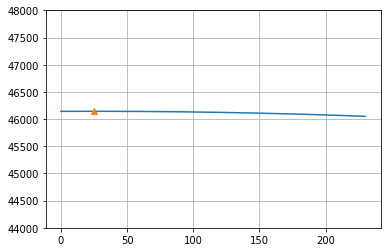

In [407]:
plt.plot(x, y)
# plt.xlim([None, 100])
plt.ylim([44000, 48000])
for d in data_min:
    # print(d)
    plt.plot(x[d], y[d], "x")
for d in data_max:
    # print(d)
    plt.plot(x[d], y[d], "^")
plt.grid()
plt.show()

In [408]:
x_t = x.copy()
y_t = y.copy()

vel = np.array([[x_t[i], y_t[i]] for i in range(x_t.size)])

print(vel)

speed = np.sqrt(x_t * x_t + y_t * y_t)

print(speed)

tangent = np.array([1/speed] * 2).transpose() * vel

#print(tangent)

ss_t = np.gradient(speed)
xx_t = np.gradient(x_t)
yy_t = np.gradient(y_t)

curvature_val = np.abs(xx_t * y_t - x_t * yy_t) / (x_t * x_t + y_t * y_t)**1.5

print(curvature_val)

[[0.00000000e+00 4.61419121e+04]
 [1.00436681e+00 4.61420215e+04]
 [2.00873362e+00 4.61421265e+04]
 [3.01310044e+00 4.61422269e+04]
 [4.01746725e+00 4.61423230e+04]
 [5.02183406e+00 4.61424146e+04]
 [6.02620087e+00 4.61425017e+04]
 [7.03056769e+00 4.61425844e+04]
 [8.03493450e+00 4.61426626e+04]
 [9.03930131e+00 4.61427363e+04]
 [1.00436681e+01 4.61428057e+04]
 [1.10480349e+01 4.61428705e+04]
 [1.20524017e+01 4.61429309e+04]
 [1.30567686e+01 4.61429869e+04]
 [1.40611354e+01 4.61430384e+04]
 [1.50655022e+01 4.61430854e+04]
 [1.60698690e+01 4.61431280e+04]
 [1.70742358e+01 4.61431662e+04]
 [1.80786026e+01 4.61431999e+04]
 [1.90829694e+01 4.61432291e+04]
 [2.00873362e+01 4.61432539e+04]
 [2.10917031e+01 4.61432742e+04]
 [2.20960699e+01 4.61432901e+04]
 [2.31004367e+01 4.61433015e+04]
 [2.41048035e+01 4.61433085e+04]
 [2.51091703e+01 4.61433110e+04]
 [2.61135371e+01 4.61433091e+04]
 [2.71179039e+01 4.61433027e+04]
 [2.81222707e+01 4.61432919e+04]
 [2.91266376e+01 4.61432766e+04]
 [3.013100